In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

### Učitavanje podataka

In [2]:
dataAssessments = pd.read_csv('../data/assessments.csv')
dataCourses = pd.read_csv('../data/courses.csv')
dataStudentAssessment = pd.read_csv('../data/studentAssessment.csv')
dataStudentInfo = pd.read_csv('../data/studentInfo.csv')
dataStudentRegistration = pd.read_csv('../data/studentRegistration.csv')
dataStudentVle = pd.read_csv('../data/studentVle.csv')
dataVle = pd.read_csv('../data/vle.csv')

### Pregled ukupnog broja zapisa i broja značajki u svakom skupu podataka

In [3]:
[
  dataAssessments.shape,
  dataCourses.shape,
  dataStudentAssessment.shape,
  dataStudentInfo.shape,
  dataStudentRegistration.shape,
  dataStudentVle.shape,
  dataVle.shape
]

[(206, 6),
 (22, 3),
 (173912, 5),
 (32593, 12),
 (32593, 5),
 (10655280, 6),
 (6364, 6)]

### Statistika za monotone atribute

In [4]:
[
    dataAssessments.nunique(),
    dataCourses.nunique(),
    dataStudentAssessment.nunique(),
    dataStudentInfo.nunique(),
    dataStudentRegistration.nunique(),
    dataStudentVle.nunique(),
    dataVle.nunique()
]

[code_module            7
 code_presentation      4
 id_assessment        206
 assessment_type        3
 date                  74
 weight                24
 dtype: int64,
 code_module                   7
 code_presentation             4
 module_presentation_length    7
 dtype: int64,
 id_assessment       188
 id_student        23369
 date_submitted      312
 is_banked             2
 score               101
 dtype: int64,
 code_module                 7
 code_presentation           4
 id_student              28785
 gender                      2
 region                     13
 highest_education           5
 imd_band                   10
 age_band                    3
 num_of_prev_attempts        7
 studied_credits            61
 disability                  2
 final_result                4
 dtype: int64,
 code_module                7
 code_presentation          4
 id_student             28785
 date_registration        332
 date_unregistration      416
 dtype: int64,
 code_module           

Svaki skup podataka ima monotone atribute, ali oni označavaju odnose između njih pa ih ne izbacujemo.

### Informacije o nazivima značajki te njihov tip podataka

In [5]:
dataAssessments.info()
dataCourses.info()
dataStudentAssessment.info()
dataStudentInfo.info()
dataStudentRegistration.info()
dataStudentVle.info()
dataVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
<class 'panda

### Deskriptivna statistika numeričkih podataka

In [6]:
dataAssessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [7]:
dataCourses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [8]:
dataStudentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [9]:
dataStudentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [10]:
dataStudentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [11]:
dataStudentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


### Provjera koje značajke imaju nedostajuće vrijednosti

In [12]:
[
  dataAssessments.isna().sum(),
  dataCourses.isna().sum(),
  dataStudentAssessment.isna().sum(),
  dataStudentInfo.isna().sum(),
  dataStudentRegistration.isna().sum(),
  dataStudentVle.isna().sum(),
  dataVle.isna().sum()
]

[code_module           0
 code_presentation     0
 id_assessment         0
 assessment_type       0
 date                 11
 weight                0
 dtype: int64,
 code_module                   0
 code_presentation             0
 module_presentation_length    0
 dtype: int64,
 id_assessment       0
 id_student          0
 date_submitted      0
 is_banked           0
 score             173
 dtype: int64,
 code_module                0
 code_presentation          0
 id_student                 0
 gender                     0
 region                     0
 highest_education          0
 imd_band                1111
 age_band                   0
 num_of_prev_attempts       0
 studied_credits            0
 disability                 0
 final_result               0
 dtype: int64,
 code_module                0
 code_presentation          0
 id_student                 0
 date_registration         45
 date_unregistration    22521
 dtype: int64,
 code_module          0
 code_presentation    0
 id

Značajke sa nedostajućim vrijednostima su:
| Značajka | Skup | Nedostajeće | Sveukupno |
| --- | --- | --- | --- |
| date | Assessments | 11 | 206 |
| score | Student assessments | 173 | 173912 |
| imd_band | Student info | 1111 | 32593 |
| date_registration | Student registration | 45 | 32593 |
| date_unregistration | Student registration | 22521 | 32593 |
| week_from | Vle | 5243 | 6364 |
| week_to | Vle | 5243 | 6364 |

- score i date_registration ćemo nedostajeće vrijednosti zamijeniti srednjom vrijednošću
- date ćemo izbaciti te zapise
- imd_band ćemo nedostajeće vrijednosti zamijeniti za "Unknown"
- date_unregistration ćemo ostaviti nedostajeće vrijednosti jer one označavaju da je student završio tečaj 
- week_from i week_to ćemo izbaciti jer ih veliki postotak nedostaje (82.4%)

In [13]:
# ubacujemo srednje vrijednosti tamo gdje nedostaju podaci
dataStudentAssessment.loc[dataStudentAssessment.score.isna(), 'score'] = dataStudentAssessment.loc[:,'score'].mean()
dataStudentRegistration.loc[dataStudentRegistration.date_registration.isna(), 'date_registration'] = dataStudentRegistration.loc[:,'date_registration'].mean()

# mijenjano nedostajuće vrijednosti u "Unknown"
dataStudentInfo.fillna(value={'imd_band': 'Unknown'}, inplace=True)

#izbacijuemo zapise kojima nedostaje značajka date
dataAssessments = dataAssessments.loc[dataAssessments.date.notnull(), :]

# izbacujemo stupce week_from i week_to
dataVle.drop(['week_from' , 'week_to'], axis=1, inplace=True)

### Stršeće vrijednosti

Možemo provijeriti postoje li stršeće vrijednosti pomoću kutijastog grafa

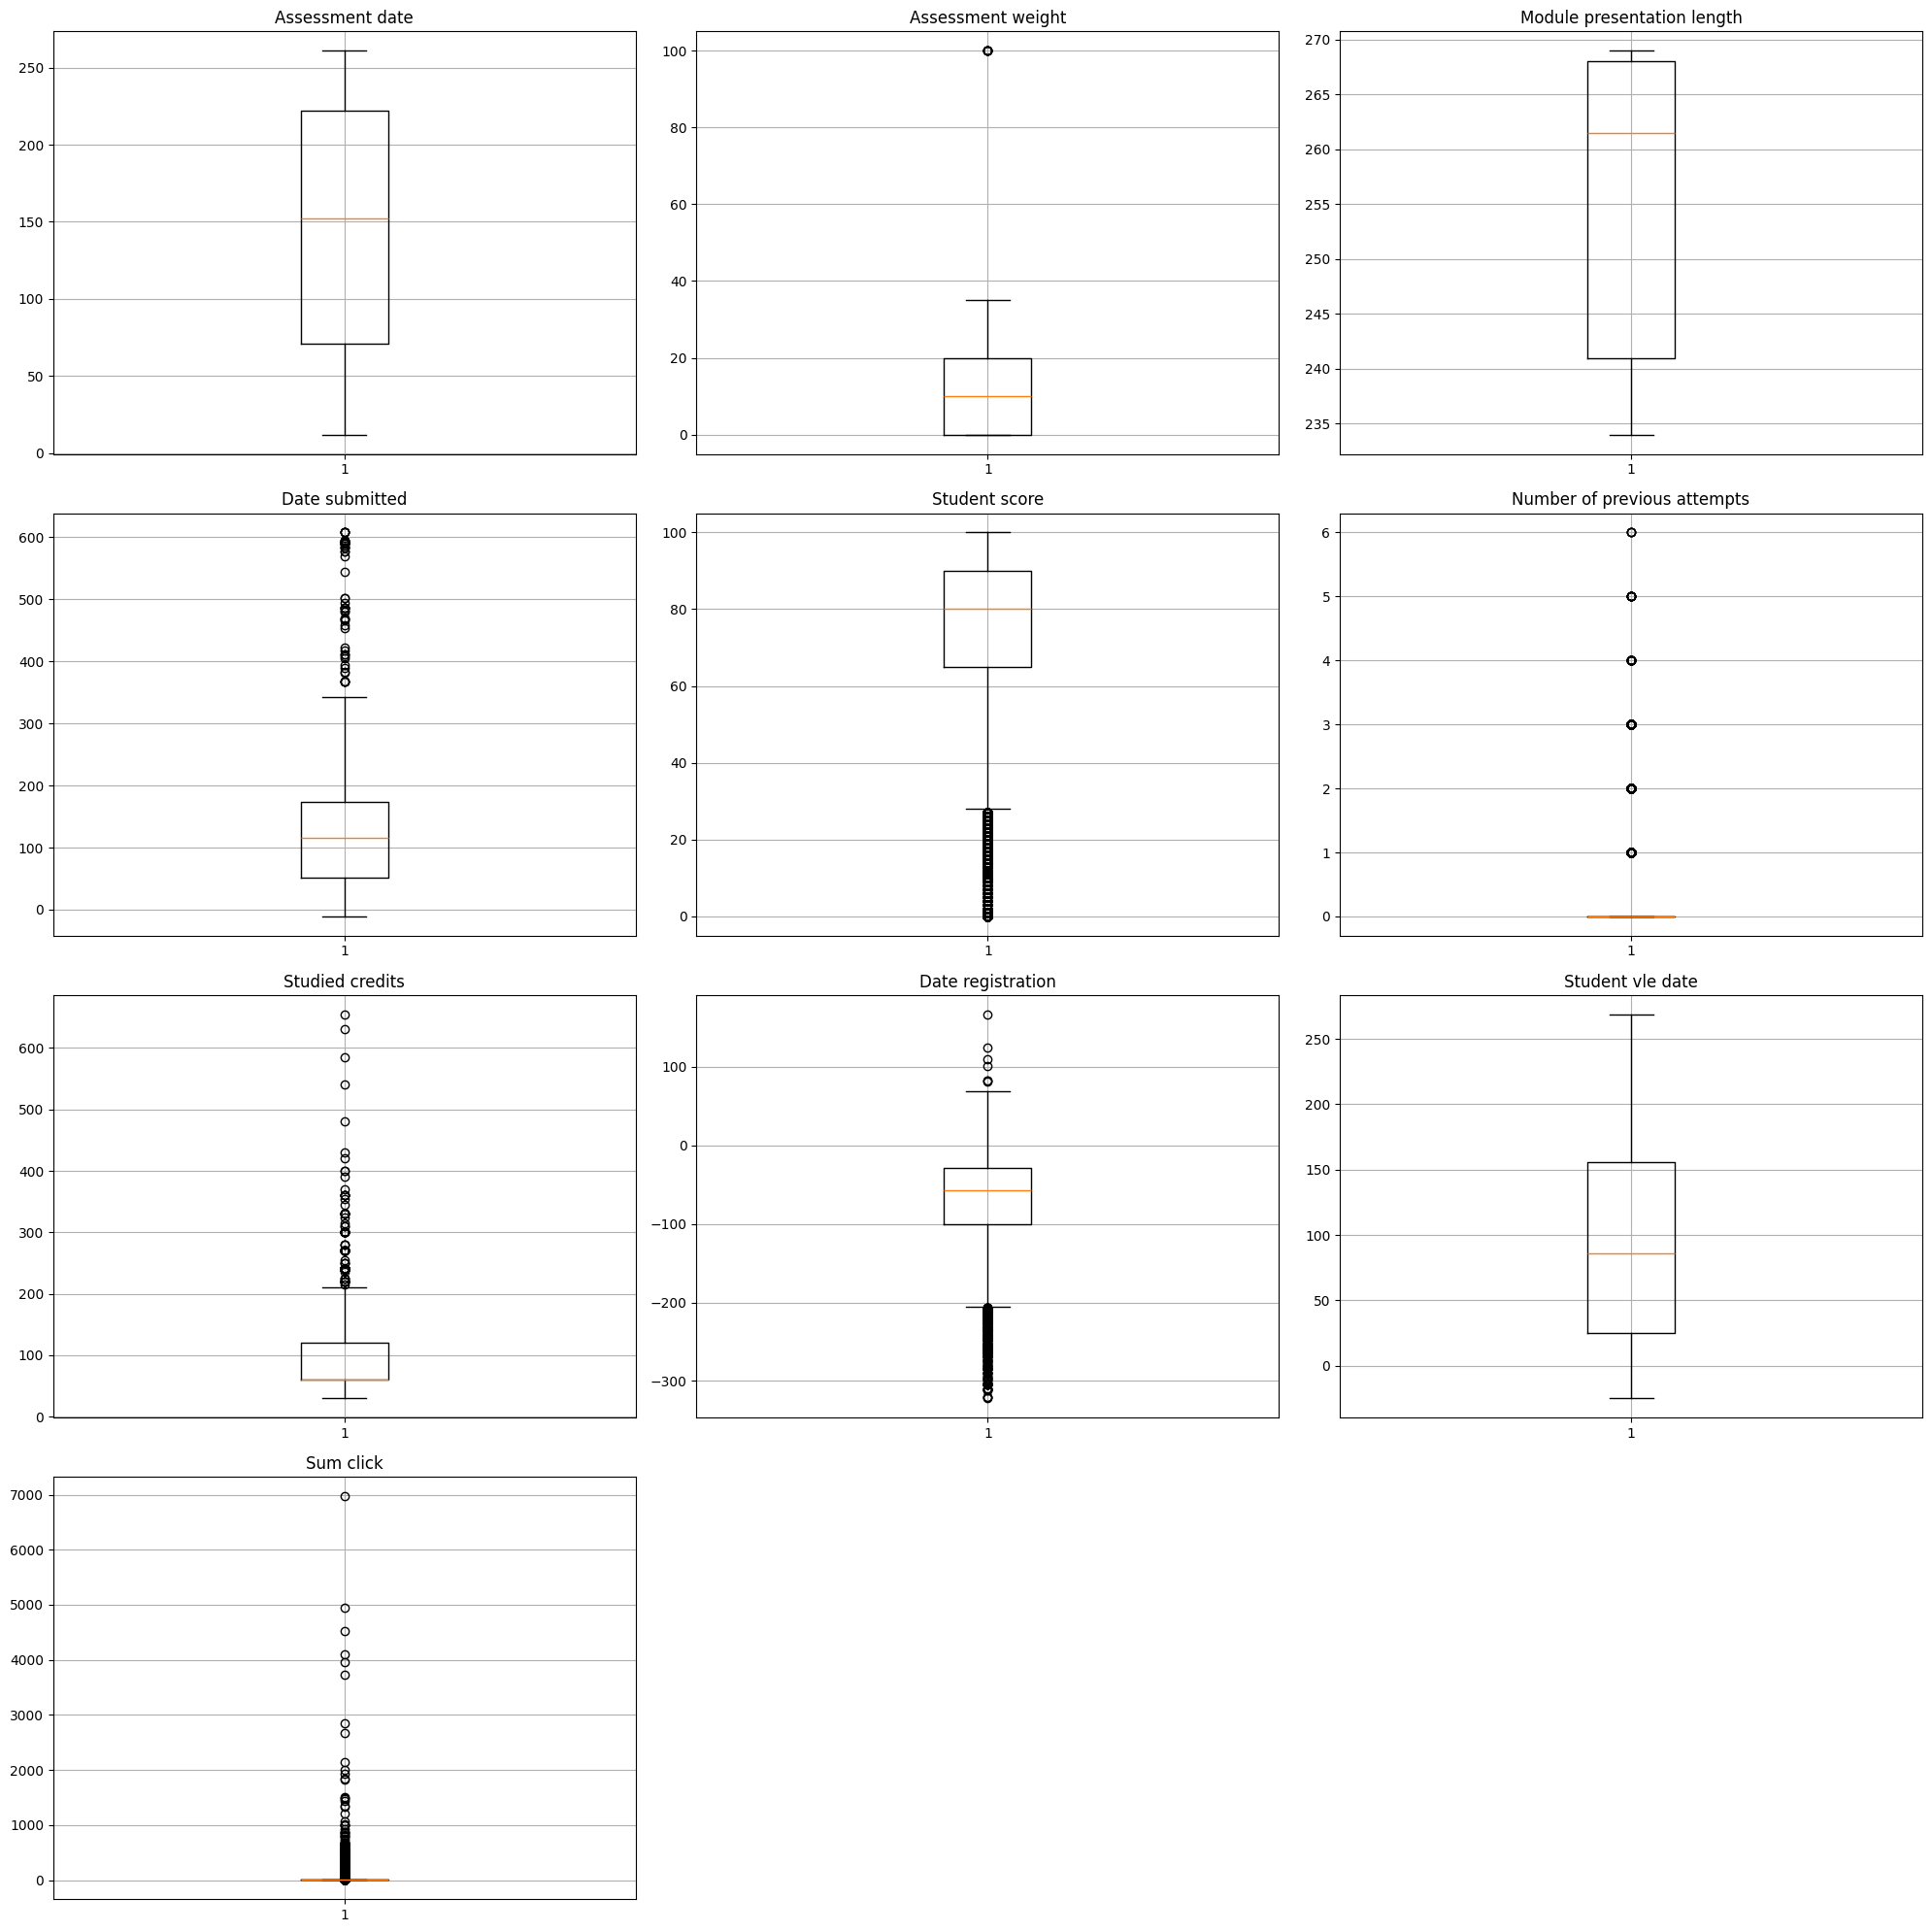

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(20, 20))
allPlots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

ax1.boxplot(dataAssessments.date)
ax2.boxplot(dataAssessments.weight)
ax3.boxplot(dataCourses.module_presentation_length)
ax4.boxplot(dataStudentAssessment.date_submitted)
ax5.boxplot(dataStudentAssessment.score)
ax6.boxplot(dataStudentInfo.num_of_prev_attempts)
ax7.boxplot(dataStudentInfo.studied_credits)
ax8.boxplot(dataStudentRegistration.date_registration)
ax9.boxplot(dataStudentVle.date)
ax10.boxplot(dataStudentVle.sum_click)

ax1.title.set_text('Assessment date')
ax2.title.set_text('Assessment weight')
ax3.title.set_text('Module presentation length')
ax4.title.set_text('Date submitted')
ax5.title.set_text('Student score')
ax6.title.set_text('Number of previous attempts')
ax7.title.set_text('Studied credits')
ax8.title.set_text('Date registration')
ax9.title.set_text('Student vle date')
ax10.title.set_text('Sum click')

fig.delaxes(ax11)
fig.delaxes(ax12)
fig.tight_layout()

for plot in allPlots:
    plot.grid()

plt.show()

- Assessment date, Module presentation length i Student vle date nemaju stršeće vrijednost
- Assessment weight ima stršeće vrijednosti na 100, ali ta vrijednost označava da je provjera ispitni rok
- Date submitted, Student score, Number of previous attempts, Studied credits, Date registration i Sum click imaju stršeće vrijednosti

### Vizualizacija podataka

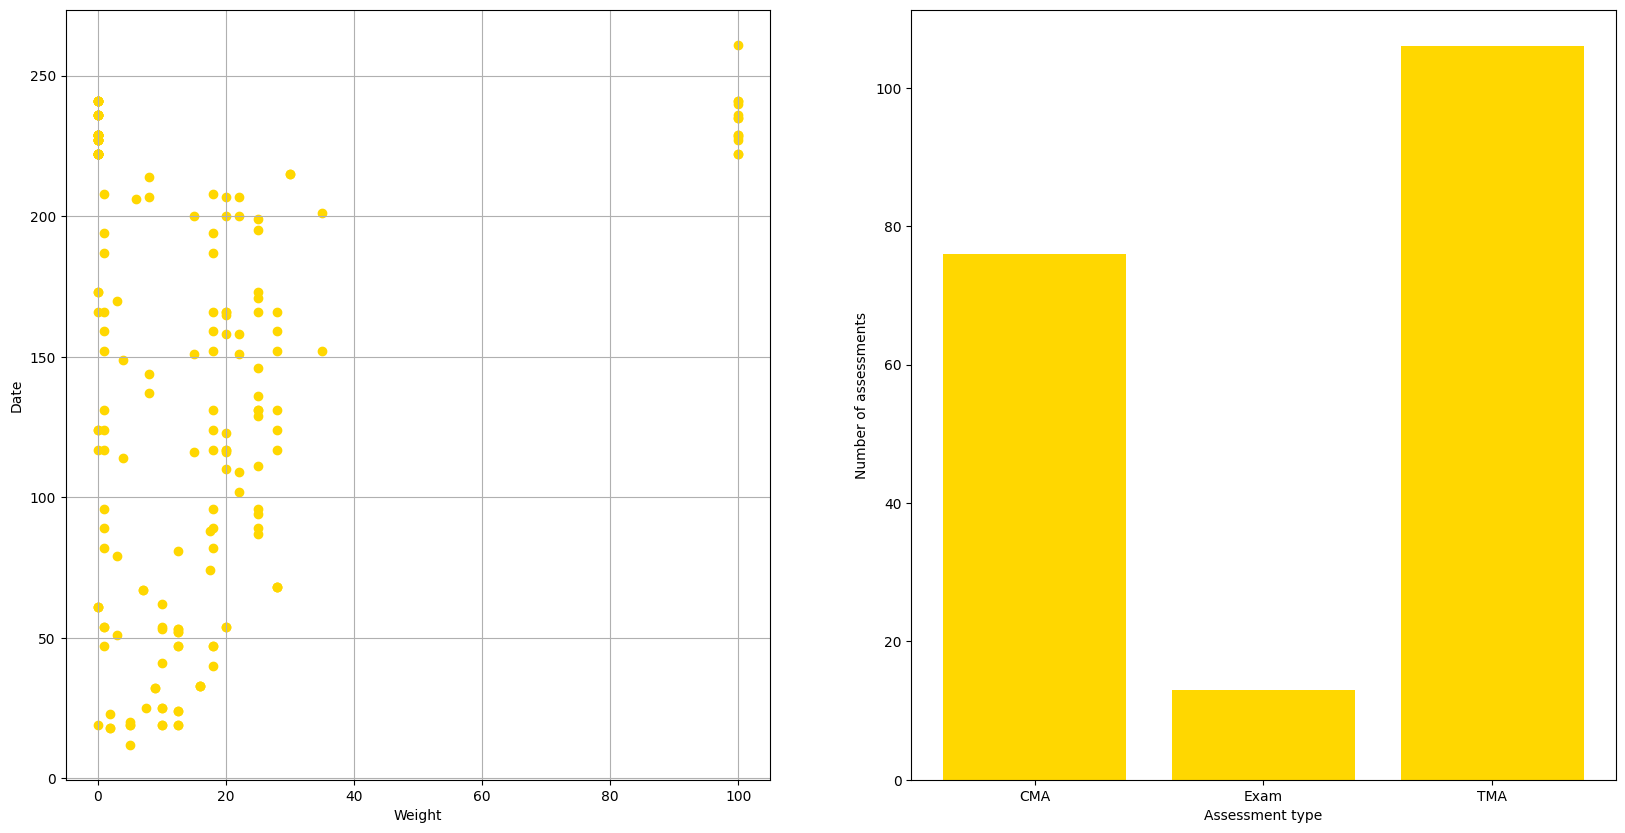

In [15]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(dataAssessments.weight, dataAssessments.date, color='gold')
ax1.grid()
ax1.set(xlabel='Weight', ylabel='Date')

count_per_assessment_type = dataAssessments.groupby('assessment_type').count().loc[:, 'id_assessment'].values
assessment_type_names = dataAssessments.groupby('assessment_type').count().index.values

ax2.bar(assessment_type_names, count_per_assessment_type, color='gold')
ax2.set(xlabel='Assessment type', ylabel='Number of assessments')

plt.show()

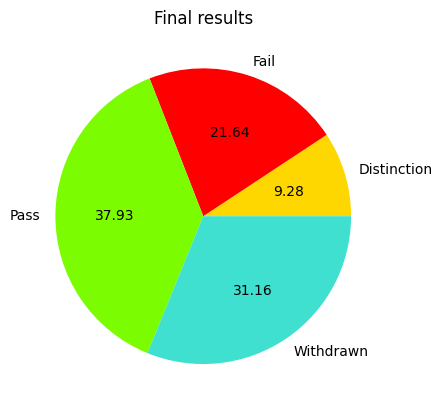

In [16]:
count_per_final = dataStudentInfo.groupby('final_result').count().loc[:, 'id_student'].values
final_name = dataStudentInfo.groupby('final_result').count().index.values

plt.pie(count_per_final, labels=final_name, autopct='%.2f', colors=['gold', 'red','lawngreen', 'turquoise'])
plt.title('Final results')
plt.show()

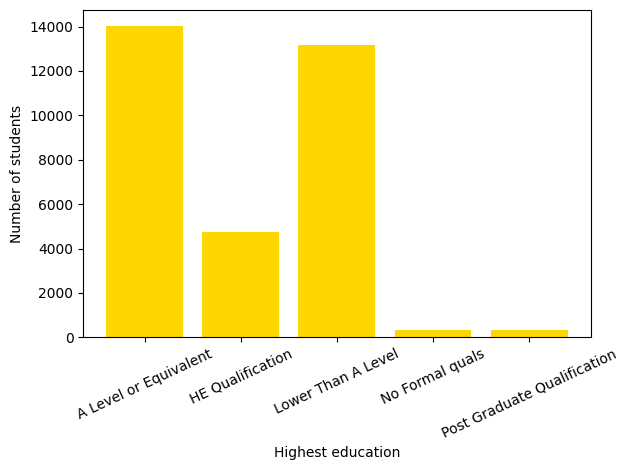

In [17]:
count_per_highest_education = dataStudentInfo.groupby('highest_education').count().loc[:, 'id_student'].values
education_type_names = dataStudentInfo.groupby('highest_education').count().index.values

plt.bar(education_type_names, count_per_highest_education, color='gold')
plt.xlabel('Highest education')
plt.xticks(rotation=25)
plt.ylabel('Number of students')
plt.tight_layout()
plt.show()

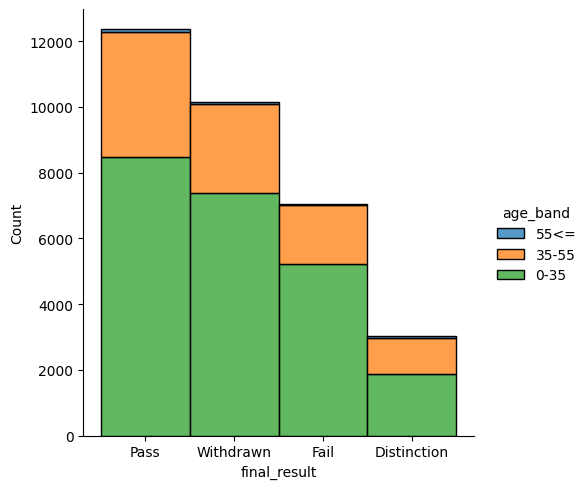

In [18]:
sns.displot(dataStudentInfo, x='final_result', hue='age_band', multiple='stack')

# Replikacija rezultata

U radu je definirano osam varijabli koje će se koristiti za predikciju:
- First Assignment Mark: bodovi studenta na prvoj provjeri, score u StudentAssessment
- Education Level: najviši stupanj obrazovanja studenta, highest_education u StudentInfo
- Clicks till Course Starts: broj klikova na materijalima prije nego je započeo tečaj, suma sum_click u StudentVle za studenta
- Registration Date: datum kad se student prijavio na tečaj, date_registration u StudentRegistration
- Age: raspon godina studenta (0-35, 35-55, >55), age u StudentInfo
- Disability: je li student izrazio da je invalid, disability u StudentInfo
- Gender: studentov spol, gender u StudentInfo
- Previous Attempts: koliko puta student nije prošao tečaj, num_of_pred_attempts u StudentInfo
I ciljna varijabla je konačni rezultat studenta, final_result u StudentInfo

Za kategoričke varijable proveden je Pearson chi-squared test za provjeru je li konačna varijabla povezana sa njima.

In [19]:
for column in ['gender', 'highest_education', 'age_band', 'disability']:
    contingency_table = pd.crosstab(dataStudentInfo[column], dataStudentInfo['final_result'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"P-value for {column}: {p}")

P-value for gender: 0.0008827203938431326
P-value for highest_education: 9.18211300726649e-212
P-value for age_band: 2.8310914670885406e-45
P-value for disability: 8.143196121271437e-30


Sve p-vrijednosti su bile niske što znači da su naše kategoričke varijable povezane sa konačnom.
Kategoričke varijable je zatim trebalo transformirati pomoću LabelEncoder i OneHotEncoder.
Gender i Disability sam transformirao sa OneHotEncoder, a Highest Educaation i Age Band sa LabelEncoder.

In [20]:
genderEncoder = OneHotEncoder()
disabilityEncoder = OneHotEncoder()
highestEducationEncoder = LabelEncoder()
ageBandEncoder = LabelEncoder()

dataStudentInfo['highest_education'] = highestEducationEncoder.fit_transform(dataStudentInfo['highest_education'])
dataStudentInfo['age_band'] = ageBandEncoder.fit_transform(dataStudentInfo['age_band'])

genderEncoder.fit(dataStudentInfo[['gender']])
disabilityEncoder.fit(dataStudentInfo[['disability']])

ohe1_tmp = genderEncoder.transform(dataStudentInfo[['gender']])
ohe2_tmp = disabilityEncoder.transform(dataStudentInfo[['disability']])

dfGender = pd.DataFrame(ohe1_tmp.toarray(), columns=genderEncoder.get_feature_names_out(['gender']))
dfDisability = pd.DataFrame(ohe2_tmp.toarray(), columns=disabilityEncoder.get_feature_names_out(['disability']))

dataStudentInfo = pd.concat([dataStudentInfo, dfGender], axis=1)
dataStudentInfo = pd.concat([dataStudentInfo, dfDisability], axis=1)

dataStudentInfo.drop(columns=['gender', 'disability'], axis=1, inplace=True)

Zatim sam izbacio sve stupce koji se neće koristiti za analizu i spojio podatke da dobijem First Assignment Mark i Clicks till Course Starts.
Na kraju sve to spojimo u jednu tablicu.

In [21]:
#Izbacivanje stupaca koji se ne koriste
dataStudentAssessment.drop(columns=['date_submitted', 'is_banked'], axis=1, inplace=True)
dataStudentInfo.drop(columns=['region', 'imd_band', 'studied_credits'], axis=1, inplace=True)
dataStudentRegistration.drop(columns=['date_unregistration'], axis=1, inplace=True)
dataAssessments.drop(columns=['assessment_type', 'weight'], axis=1, inplace=True)

#First Assigment Mark - prva provjera za svaki tečaj spojeno sa podacima studenta na toj provjeri
firstAssessmentMark = dataAssessments.loc[dataAssessments.groupby(['code_module', 'code_presentation']).date.idxmin()].merge(dataStudentAssessment, on=['id_assessment'])
#Clicks till Course Starts - filtirano da je datum klikanja manji od nula i zatim sumirano klikanje
summedStudentVle = dataStudentVle.loc[dataStudentVle['date'] < 0].groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum()

#Spajanje podataka
df = firstAssessmentMark.merge(
    summedStudentVle, 
    on=['id_student']
).merge(
    dataStudentRegistration, 
    on=['id_student', 'code_module', 'code_presentation']
).merge(
    dataStudentInfo, 
    on=['id_student', 'code_module', 'code_presentation']
)

#Izbacivanje monotonih atributa
df.drop(columns=['code_module', 'code_presentation', 'id_assessment', 'date', 'id_student'], axis=1, inplace=True)

Prikazana je korelacija između varijabli.

In [22]:
df.loc[:, df.columns != 'final_result'].corr()

,score,sum_click,date_registration,highest_education,age_band,num_of_prev_attempts,gender_F,gender_M,disability_N,disability_Y
score,1.000000,0.127679,0.049426,-0.049667,0.016702,-0.038634,-0.102640,0.102640,0.047914,-0.047914
sum_click,0.127679,1.000000,-0.062443,0.013551,0.130937,-0.032439,-0.042917,0.042917,-0.000461,0.000461
date_registration,0.049426,-0.062443,1.000000,0.010518,0.012969,-0.015319,0.001580,-0.001580,0.012630,-0.012630
highest_education,-0.049667,0.013551,0.010518,1.000000,0.088347,0.033031,0.001714,-0.001714,-0.003526,0.003526
age_band,0.016702,0.130937,0.012969,0.088347,1.000000,0.015130,0.010320,-0.010320,0.028179,-0.028179
num_of_prev_attempts,-0.038634,-0.032439,-0.015319,0.033031,0.015130,1.000000,0.022287,-0.022287,-0.073898,0.073898
gender_F,-0.102640,-0.042917,0.001580,0.001714,0.010320,0.022287,1.000000,-1.000000,-0.051070,0.051070
gender_M,0.102640,0.042917,-0.001580,-0.001714,-0.010320,-0.022287,-1.000000,1.000000,0.051070,-0.051070
disability_N,0.047914,-0.000461,0.012630,-0.003526,0.028179,-0.073898,-0.051070,0.051070,1.000000,-1.000000
disability_Y,-0.047914,0.000461,-0.012630,0.003526,-0.028179,0.073898,0.051070,-0.051070,-1.000000,1.000000


Uzmemo iz podataka ciljnu varijablu i odbacimo stupce za Disability i Number of Previous Attempts jer su tako naveli u radi.
Stvorimo skupove ta treniranje i testiranje.

In [33]:
#Varijable
X = df.drop(columns=['final_result', 'disability_N', 'disability_Y', 'num_of_prev_attempts'], axis=1)
#Ciljna varijabla
y = df['final_result']

#Podjela na skupove za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

U radu su koristili One Vs Rest klasifikaciju te decision tree, random forest i BART(Bayesian Additive Regression Trees) algoritme.

In [34]:
ovr_dtc = OneVsRestClassifier(DecisionTreeClassifier())
ovr_rfc = OneVsRestClassifier(RandomForestClassifier())

ovr_dtc.fit(X_train, y_train)
ovr_rfc.fit(X_train, y_train)

y_pred_dtc = ovr_dtc.predict(X_test)
y_pred_rfc = ovr_rfc.predict(X_test)

Rezultati decision tree-a:

In [35]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

 Distinction       0.29      0.15      0.19       930
        Fail       0.29      0.15      0.20      1509
        Pass       0.54      0.45      0.49      3717
   Withdrawn       0.26      0.55      0.35      1592

    accuracy                           0.38      7748
   macro avg       0.35      0.32      0.31      7748
weighted avg       0.41      0.38      0.37      7748



Rezultati random forest-a:

In [36]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

 Distinction       0.36      0.23      0.28       930
        Fail       0.35      0.23      0.27      1509
        Pass       0.54      0.74      0.62      3717
   Withdrawn       0.43      0.30      0.35      1592

    accuracy                           0.49      7748
   macro avg       0.42      0.37      0.38      7748
weighted avg       0.46      0.49      0.46      7748



Matrica zabune za Decision Tree:

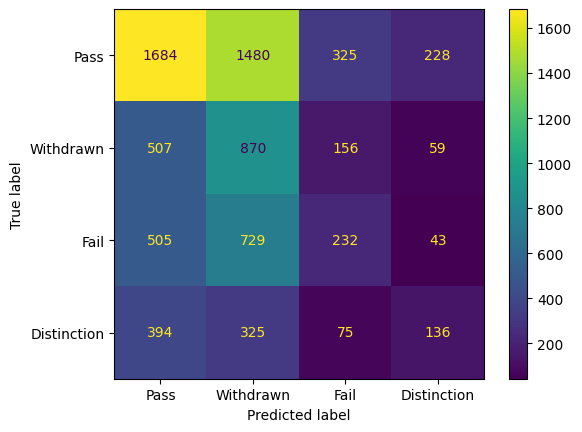

In [37]:
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc, labels=y.unique())
disp_dtc = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=y.unique())
disp_dtc.plot()
plt.show()

Matrica zabune za Random Forest:

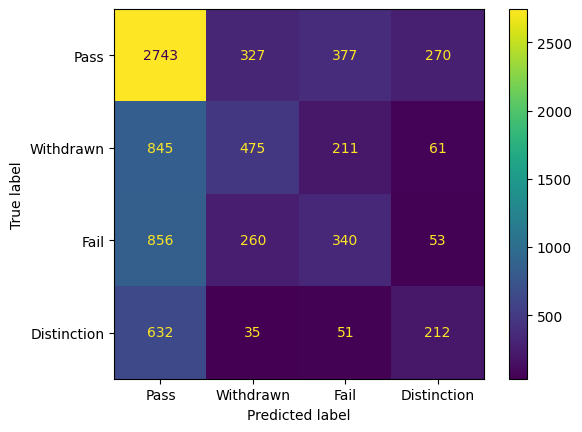

In [38]:
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc, labels=y.unique())
disp_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=y.unique())
disp_rfc.plot()
plt.show()